In [1]:
from trackml.dataset import load_event
import kaggleHelpers as kH

In [2]:
hits, cells, particles, truth = load_event('kaggleData/train_100_events/event000001000')
kH.procssParticles(particles)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
detData = pd.read_csv("../trackingml/detectors.csv")

In [5]:
detGeo = kH.makeKaggleDetector(detData)

In [6]:
weirdParticles = particles[(particles["particle_id"] == 4550397591027712) | (particles["particle_id"] == 864711744298156032)]
weirdParticles

particle_id        vx        vy       vz       px       py  \
338      4550397591027712  6.075700 -3.018280 -1.65696  7.38497 -3.59907   
10887  864711744298156032  0.087091  0.022427 -1.22682  4.26580  1.24219   

             pz  q  nhits        pt            rc       phi  
338    -1.75212  1     18  8.215296  14397.928390 -0.453477  
10887  16.13200 -1     12  4.442982   7786.662132  0.283362

In [7]:
truth[truth["particle_id"] == 4550397591027712]

hit_id       particle_id          tx          ty           tz  \
19987    19988  4550397591027712   28.968000  -13.449000    -6.604580   
20223    20224  4550397591027712   31.163099  -14.574300    -7.378910   
28860    28861  4550397591027712   65.534698  -29.097099   -21.975000   
36079    36080  4550397591027712   99.287498  -60.601898   -50.022099   
42581    42582  4550397591027712  133.574005 -108.694000   -59.948898   
74064    74065  4550397591027712  195.695007 -168.636002   -82.618599   
81132    81133  4550397591027712  253.479996 -250.337006   -50.106602   
81613    81614  4550397591027712  260.286011 -256.858002   -39.361401   
81618    81619  4550397591027712  255.399002 -252.598999   -46.832100   
88678    88679  4550397591027712  363.928009 -341.933014   118.543999   
95571    95572  4550397591027712  504.569000 -428.464996   407.299011   
112551  112552  4550397591027712  677.411011 -460.541992   910.065979   
118266  118267  4550397591027712  692.051025 -482.688995  1214.500000   
118841  118842  4550397591027712  770.729004 -455.178986  1494.500000   
118842  118843  4550397591027712  771.726013 -454.795013  1505.500000   
119297  119298  4550397591027712  805.390991 -395.812988  1797.500000   
119300  119301  4550397591027712  806.799011 -395.153992  1802.500000   
119717  119718  4550397591027712  953.783020 -281.653015  2155.500000   

             tpx       tpy       tpz    weight  
19987   7.132050 -3.655530 -2.515790  0.000042  
20223   7.368750 -3.172380 -2.489040  0.000038  
28860   7.071110 -2.375850 -3.860640  0.000034  
36079   6.380700 -3.838120 -3.881100  0.000024  
42581   4.028160 -7.340560 -0.617754  0.000019  
74064   4.630370 -6.528740  2.528530  0.000015  
81132   3.646180 -4.296630  6.220130  0.000022  
81613   4.252590 -3.461630  6.354100  0.000030  
81618   4.148230 -3.612550  6.339260  0.000026  
88678   3.590530 -2.241510  7.246840  0.000013  
95571   2.900210 -0.392308  7.865020  0.000013  
112551  0.638350 -0.955722  8.311900  0.000013  
118266 -3.239390  1.355990  7.619320  0.000013  
118841  1.196220  0.578549  8.282550  0.000014  
118842  0.923294  1.651060  8.171450  0.000018  
119297  1.331620  1.073940  8.211160  0.000021  
119300  3.131670  2.203370  7.461280  0.000023  
119717 -0.898296  8.244350  1.239550  0.000025

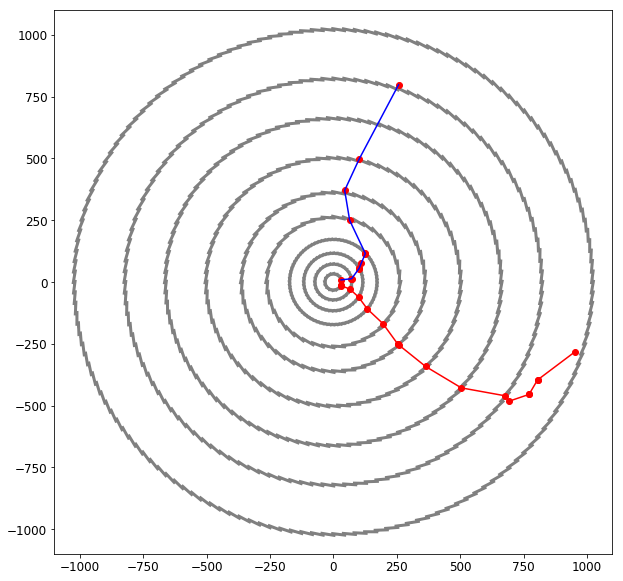

In [8]:
from TrackHelper import drawTrackXY, drawTrackZR,drawTrack


fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)



for index, row in weirdParticles.iterrows():

    pt = row["pt"]
    rc = row["rc"]#pt/(e*B)/(5.06*10**(12))
    pz = row["pz"]
    q  = row["q"]
    phi= row["phi"]#np.arctan2(row["py"],row["px"])
        
    trk_hits = truth[(truth["particle_id"] == row["particle_id"])]
    color = "r"
    if q < 0: color = "b"
    plt.plot(trk_hits["tx"],trk_hits["ty"],'ro')
    plt.plot(trk_hits["tx"],trk_hits["ty"], color)

fig, ax = plt.subplots(1, figsize=(10,5))
zoomRZ = 3000
ax.set_xlim((-zoomRZ, zoomRZ))
ax.set_ylim((0,zoomRZ/2))

detGeo.drawDetectorZR(ax,True)
    


for index, row in weirdParticles.iterrows():
    q  = row["q"]

    trk_hits = truth[(truth["particle_id"] == row["particle_id"])]
    color = "r"
    if q < 0: color = "b"
    plt.plot(trk_hits["tz"],np.sqrt(trk_hits["tx"]**2+trk_hits["ty"]**2),'ro') 
    plt.plot(trk_hits["tz"],np.sqrt(trk_hits["tx"]**2+trk_hits["ty"]**2),color) 